#Kyphosis DataSet

The objective of this project is to predict whether a patient has kyphosis or not, based on
given features and diagnostic measurements such as age and number of vertebrae.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

 Getting the Data

In [4]:
df = pd.read_csv('kyphosis.csv')

In [5]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA


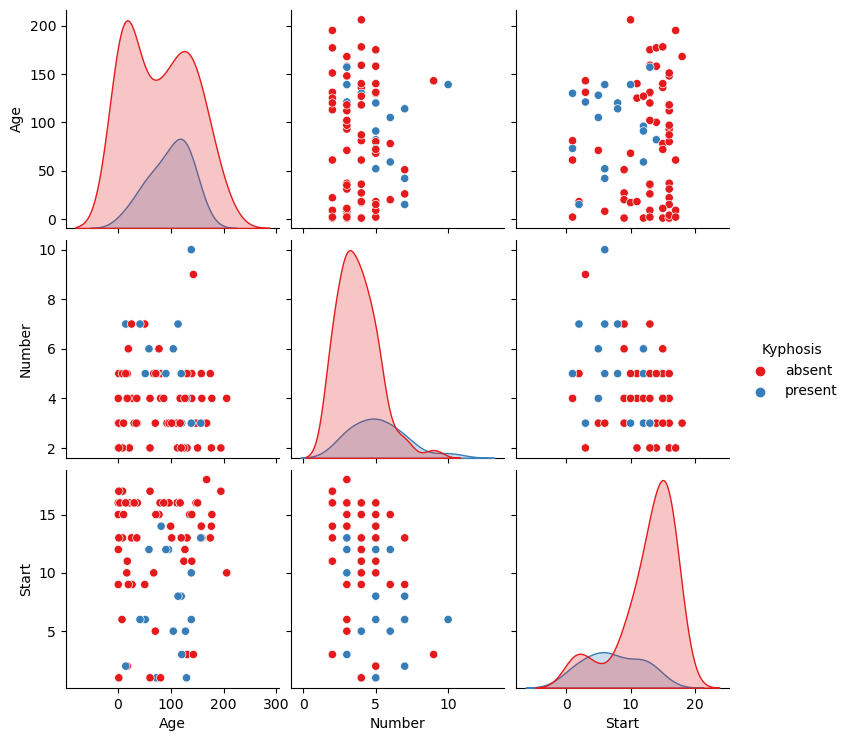

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.76      0.80        21
     present       0.17      0.25      0.20         4

    accuracy                           0.68        25
   macro avg       0.50      0.51      0.50        25
weighted avg       0.73      0.68      0.70        25



In [16]:
print(confusion_matrix(y_test,predictions))

[[16  5]
 [ 3  1]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[18  3]
 [ 3  1]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        21
     present       0.25      0.25      0.25         4

    accuracy                           0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25

